# Different Ways to Create a Group

This notebook features the different ways that a group can be created with the <b>algebras</b> module.

Basically, the ways are:
* Using the <b>Group object constructor</b> (there are six variations of this)
* Calling a <b>group generator</b> (e.g., generate_cyclic_group)
* Computing the <b>direct product</b> of two or more groups

## Imports and Paths

In [1]:
import algebras as alg
import numpy as np
import json
import os

In [2]:
# Path to this repo
aa_path = os.path.join(os.getenv('PYPROJ'), 'abstract_algebra')

# Path to a directory containing Algebra definitions in JSON
alg_dir = os.path.join(aa_path, "Algebras")

## Using the Group Constructor

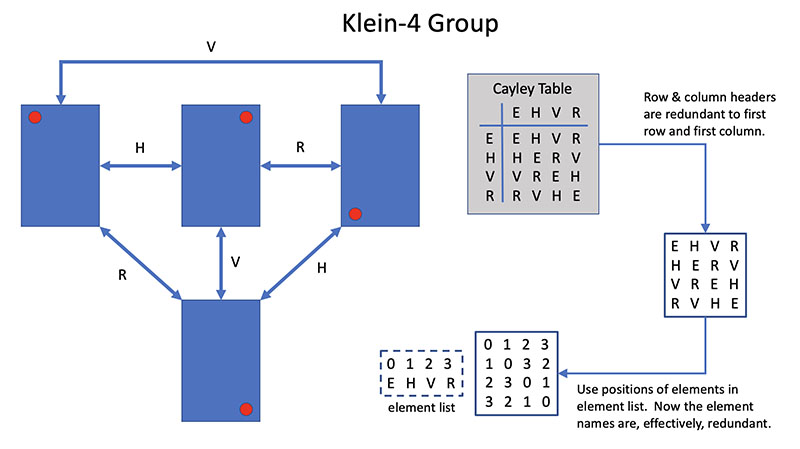

### Constructor Method 1

This method of instantiation provides four inputs:

1. <b>name</b>: A string name for the group;
1. <b>description</b>: A string describing the group;
1. <b>element_names</b>: A list of strings that represent the names of group elements;
1. <b>addition_table</b>: a list of lists (2D array) of integers,The following requirements on the array must be adhered to:
  * The elements of the array must be integers that reference the group's elements according to their index (position) in the list, element_names.  This implies that the integers must be from the set, {0, 1, 2, ..., n-1}, where n is the number of elements.
  * 0 must always refer to the identity element for the group operation (addition).
  * The first row and first column must be the integers in order, 0, 1, 2,..., n-1.

In [3]:
g1 = alg.Group('V4',
               'Klein-4 group',
               ['e',  'h',  'v', 'hv'],
               [[0, 1, 2, 3],
                [1, 0, 3, 2],
                [2, 3, 0, 1],
                [3, 2, 1, 0]]
              )
g1.pprint()

Group('V4',
'Klein-4 group',
['e', 'h', 'v', 'hv'],
[[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]
)


### Constructor Method 2

This method of instantiation provides three inputs:

1. <b>name</b>: A string name for the group;
1. <b>description</b>: A string describing the group;
1. <b>addition_table</b>: a list of lists (2D array) of strings, representing the names of elements, where:
   * The name in the first row and first column is the name of the identity element;
   * The order of elements in the first row and first column are the same.

In [4]:
g2 = alg.Group('V4',
               'Klein-4 group',
               [[ 'e', 'h' ,  'v', 'hv'],
                [ 'h', 'e' , 'hv', 'v' ],
                [ 'v', 'hv',  'e', 'h' ],
                ['hv', 'v' ,  'h', 'e' ]]
              )
g2.pprint()

Group('V4',
'Klein-4 group',
['e', 'h', 'v', 'hv'],
[[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]
)


### Constructor Method 3

The group definition, similar to that of Method 1, can be stored in a file in JSON format and then read-in to instantiate a group.

In [5]:
v4_path = os.path.join(alg_dir, "v4_klein_4_group.json")

print("\nHere's a look at the contents of the JSON file:\n")
!cat {v4_path}


Here's a look at the contents of the JSON file:

{"type": "Group",
 "name": "V4",
 "description": "Klein-4 group",
 "element_names": ["e", "h", "v", "hv"],
 "mult_table": [[0, 1, 2, 3],
                [1, 0, 3, 2],
                [2, 3, 0, 1],
                [3, 2, 1, 0]]
}


And, here's where the group is created by reading the JSON file.  Basically, if the first, and only argument, given to the Group constructor is a string, it is assumed to be a path to a JSON file definition of a Group.

In [6]:
g3 = alg.Group(v4_path)
g3.pprint()

Group('V4',
'Klein-4 group',
['e', 'h', 'v', 'hv'],
[[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]
)


### Constructor Method 4

This method is a blend of Methods 3 & 4, wherein the group definition resides in a JSON file, but the table is defined using element names (strings) and there is no need to define the list of elements.

In [7]:
v4_path_VERS2 = os.path.join(alg_dir, "v4_klein_4_group_VERS2.json")

!cat {v4_path_VERS2}

{"type": "Group",
 "name": "V4",
 "description": "Klein-4 group, Version 2",
 "mult_table": [[ "e",  "h",  "v", "hv"],
                [ "h",  "e", "hv",  "v"],
                [ "v", "hv",  "e",  "h"],
                ["hv",  "v",  "h",  "e"]]
}


In [8]:
g4 = alg.Group(v4_path_VERS2)
g4.pprint()

Group('V4',
'Klein-4 group, Version 2',
['e', 'h', 'v', 'hv'],
[[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]
)


### Constructor Method 5

If the first, and only, argument to the Group constructor is a dictionary, it is assumed that it defines a Group, per the types of input arguments, above.

In [9]:
v4_dict = {'name': 'V4',
           'description': 'Klein-4 group',
           'element_names': ['e', 'h', 'v', 'hv'],
           'mult_table': [[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]}

In [10]:
g5 = alg.Group(v4_dict)
g5.pprint()

Group('V4',
'Klein-4 group',
['e', 'h', 'v', 'hv'],
[[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]
)


### Constructor Method 6

In [11]:
v4_dict_VERS2 = {'name': 'V4',
                 'description': 'Klein-4 group, Dictionary Version 2',
                 'mult_table': [[ 'e', 'h' ,  'v', 'hv'],
                                [ 'h', 'e' , 'hv', 'v' ],
                                [ 'v', 'hv',  'e', 'h' ],
                                ['hv', 'v' ,  'h', 'e' ]]
                }

In [12]:
g6 = alg.Group(v4_dict_VERS2)
g6.pprint()

Group('V4',
'Klein-4 group, Dictionary Version 2',
['e', 'h', 'v', 'hv'],
[[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]
)


### Constructor Method 7

A group constructed from just a multiplication table.

In [13]:
g7 = alg.Group([[ 'e', 'h' ,  'v', 'hv'],
                [ 'h', 'e' , 'hv', 'v' ],
                [ 'v', 'hv',  'e', 'h' ],
                ['hv', 'v' ,  'h', 'e' ]])

In [14]:
g7.pprint()

Group('no name',
'Constructed from multiplication table',
['e', 'h', 'v', 'hv'],
[[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]
)


The group's name and description can be changed at any time:

In [15]:
g7.name = "Just plain old V4"
g7.description = "V4 yet again"
g7.pprint()

Group('Just plain old V4',
'V4 yet again',
['e', 'h', 'v', 'hv'],
[[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]
)


## Group Generators

In [16]:
z4_gen = alg.generate_cyclic_group(8)
z4_gen.pprint()

Group('Z8',
'Autogenerated cyclic group of order 8',
['e', 'a', 'a^2', 'a^3', 'a^4', 'a^5', 'a^6', 'a^7'],
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 0],
 [2, 3, 4, 5, 6, 7, 0, 1],
 [3, 4, 5, 6, 7, 0, 1, 2],
 [4, 5, 6, 7, 0, 1, 2, 3],
 [5, 6, 7, 0, 1, 2, 3, 4],
 [6, 7, 0, 1, 2, 3, 4, 5],
 [7, 0, 1, 2, 3, 4, 5, 6]]
)


## Direct Products

In [17]:
z2 = alg.generate_cyclic_group(2)

In [18]:
z2_x_z2_x_z2 = z2 * z2 * z2

z2_x_z2_x_z2.pprint()

Group('Z2_x_Z2_x_Z2',
'Direct product of Z2_x_Z2 & Z2',
['e:e:e', 'e:e:a', 'e:a:e', 'e:a:a', 'a:e:e', 'a:e:a', 'a:a:e', 'a:a:a'],
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 0, 3, 2, 5, 4, 7, 6],
 [2, 3, 0, 1, 6, 7, 4, 5],
 [3, 2, 1, 0, 7, 6, 5, 4],
 [4, 5, 6, 7, 0, 1, 2, 3],
 [5, 4, 7, 6, 1, 0, 3, 2],
 [6, 7, 4, 5, 2, 3, 0, 1],
 [7, 6, 5, 4, 3, 2, 1, 0]]
)
